In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
%sql
select * from tmp_mm1

nr_proposta,DS_SAFRA,DS_PRODUTO,DS_MODELO,sc_serasa,sc_bvs,sc_ecp,sc_bh,TP_CLIENTE,DS_RISCO,QTD_O30M4_SLD,VLR_O30M4_SLD,VLR_FINANCIADO,FL_SIN4,FL_SIN6,flag_efetivadas,familia_produto
3812256101,202012,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,3460.0,null,null,0,AUTO
3812272970,202012,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,6250.0,null,null,0,AUTO
3812215784,202012,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,4600.0,0,0,1,AUTO
3805568234,201812,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,8522.26,null,null,0,AUTO
3807345641,201906,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,3613.68,null,null,0,AUTO
3808391769,201909,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,11573.81,null,null,0,AUTO
3808736945,201910,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,8371.69,null,null,0,AUTO
3807357939,201906,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,9355.42,null,null,0,AUTO
3810795537,202005,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,5340.0,null,null,0,AUTO
3805332497,201811,AUTO,null,null,0,null,null,CLIENTE NOVO,06 - ALTISSIMO,0,0.0,9529.58,null,null,0,AUTO


In [0]:
%sql
select distinct(DS_MODELO) from tmp_mm1

DS_MODELO
NAO INFORMADO
ABORTA
BEHAVIOR
null
CPC5
FALHA
PX
N
INTERNO
CPC4


In [0]:
%sql
--criação da view
create or replace temp view tmp_mm as 
select 
    nr_proposta, 
    ds_modelo,
    case when ds_modelo = 'PX' then sc_bvs
         when ds_modelo = 'P9' then sc_bvs
         when ds_modelo = 'ECP1901' then (sc_ecp * -1) + 263
         when ds_modelo = 'BEHAVIOR' then int(((int(sc_bh)/1300) * 1000))
         when ds_modelo = 'CPC5' then sc_serasa
    end as nr_score,
    fl_sin4,
    ds_safra,
    flag_efetivadas
from tmp_mm1
where 
(case when ds_modelo = 'PX' then sc_bvs
      when ds_modelo = 'P9' then sc_bvs
      when ds_modelo = 'ECP1901' then sc_ecp
      when ds_modelo = 'BEHAVIOR' then int(((int(sc_bh)/1300) * 1000))
      when ds_modelo = 'CPC5' then sc_serasa end)
  is not null and 
(case when ds_modelo = 'PX' then sc_bvs
      when ds_modelo = 'P9' then sc_bvs
      when ds_modelo = 'ECP1901' then sc_ecp
      when ds_modelo = 'BEHAVIOR' then int(((int(sc_bh)/1300) * 1000))
      when ds_modelo = 'CPC5' then sc_serasa end) > 0

In [0]:
%sql
-- Base de monitoramento de Modelos.
create or replace temp view base_prop_sdk_tempo as 
select 
  b.proposta,
  'SDK' as ds_modelo,
  case when cast(a.calc_score_sdk as int) > 961 then 961 else cast(a.calc_score_sdk as int) end as nr_score,
  b.sin4 as FL_SIN4,
  b.safra_aprovacao as ds_safra,
  b.flag_efetivadas
from 
(select
    ciccgc,
    calc_score_sdk,
    flag_efetivadas
  from
    inf_trustedzone.view_credito
  where calc_score_sdk > 0) as a
left join
    inf_trustedzone.view_credito as b
on a.ciccgc = b.ciccgc

In [0]:
%sql
create or replace temp view tmp_mm_px as 
select * from tmp_mm as a
union all
select * from base_prop_sdk_tempo as b where ds_safra > 202001

In [0]:
%sql
select * from tmp_mm_px

nr_proposta,ds_modelo,nr_score,fl_sin4,ds_safra,flag_efetivadas
3815028887,PX,931,null,202109,0
3815041677,PX,916,null,202109,0
3815049199,PX,918,null,202109,0
3815524414,PX,932,null,202110,0
3815097312,PX,919,null,202109,0
3814723251,PX,937,null,202108,0
3815124148,PX,932,null,202109,0
3814736905,PX,936,null,202108,0
3814777505,PX,934,null,202108,0
3815223610,PX,926,null,202109,0


In [0]:
modelos = ['BEHAVIOR', 'ECP1901', 'PX', 'P9', 'CPC5', 'SDK']

decil_modelos = None

for modelo in modelos:
  
  #data de desenvolvimento ''
  if modelo == 'BEHAVIOR':
    dt_desenv = 202002
  elif modelo == 'ECP1901':
    dt_desenv = 202002
  elif modelo == 'PX':
    dt_desenv = 202010
  elif modelo == 'P9':
    dt_desenv = 201912
  elif modelo == 'CPC5':
    dt_desenv = 201910
  elif modelo == 'SDK':
    dt_desenv = 202103
    
    
  #---------------------------Período Desenv-------------------------------
  
  #Consulta periodo desenvolvimento para geração dos decis
  query = ("select * from tmp_mm_px where ds_modelo = '" + modelo + "' and ds_safra <= " + str(dt_desenv))

  #consulta
  decil_desenv = spark.sql(query).select("*").toPandas()

  #retorna os bins para os decis de desenvolvimento -> Todos, para calculo do PSI
  res, fx_desenv = pd.qcut(decil_desenv['nr_score'], 10, retbins=True)
  
  #caso o modelo retorne algum valor que não existe, estou mudando manualmente os bins
  fx_desenv[0] = -10

  #Volumetria por Decil, podemos verificar que existe uma certa concentração na faixa 4
  decil_desenv = decil_desenv.groupby(pd.qcut(decil_desenv.nr_score, 10))['nr_proposta'].count()

  #DataFrame com os decis do desenvolvimento 
  decil_desenv = pd.DataFrame(decil_desenv).reset_index().reset_index().rename(columns={'index':'gp', 'nr_score':'fx_desenv'})
  decil_desenv['pct_desenv'] = decil_desenv['nr_proposta']/sum(decil_desenv['nr_proposta'])

  
  #------------------------------Produção-------------------------------
  
  #Consulta periodo desenvolvimento para geração dos decis
  query = ("select * from tmp_mm_px where ds_modelo = '" + modelo + "'")

  #Consulta
  decil_prod = spark.sql(query).select("*").toPandas()

  #Realiza as quebras no dataframe de produção
  decil_prod = decil_prod.merge(pd.DataFrame(pd.cut(decil_prod['nr_score'],fx_desenv)).rename(columns={'nr_score':'fx_desenv'}),how='left', right_index=True, left_index=True)

  #Cria os grupos -> o Fillna 0 funciona pois para a primeira faixa a função cut realiza uma quebra menor no primeiro numero
  decil_prod = decil_prod.merge(decil_desenv[['fx_desenv','gp']],how='left',on='fx_desenv').fillna({"gp": 0})

  #Transformo a variavel fx_desenv em string para realizar a conversa em spark dataframe, posteriormente em uma view para criar os graficos stacked 100%
  decil_prod['fx_desenv'] = decil_prod['fx_desenv'].astype(str)
  
  #Appenda o resultado do processamento para uma tabela agrupada
  if decil_modelos is None:
    decil_modelos = decil_prod
  else:
    decil_modelos = decil_modelos.append(decil_prod)
    
#Criando uma view para consulta
spark.createDataFrame(decil_modelos).createOrReplaceTempView('decil_modelos')

In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where ds_safra > 201906 and ds_modelo = "BEHAVIOR" group by 1,2 order by 1,2

ds_safra,gp,qtd
201907,0,1557
201907,1,1555
201907,2,2006
201907,3,286
201907,4,1508
201907,5,1677
201907,6,1128
201907,7,1433
201907,8,1367
201907,9,1547


In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where ds_modelo = "P9" group by 1,2 order by 1,2

ds_safra,gp,qtd
201808,0,2433
201808,1,2048
201808,2,2095
201808,3,1751
201808,4,1941
201808,5,1818
201808,6,1839
201808,7,1773
201808,8,1716
201808,9,1993


In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where ds_safra > 202002 and ds_modelo = "PX" group by 1,2 order by 1,2

ds_safra,gp,qtd
202003,0,7864
202003,1,7603
202003,2,7601
202003,3,7072
202003,4,7463
202003,5,6774
202003,6,6436
202003,7,6321
202003,8,6527
202003,9,6285


In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where ds_modelo = "ECP1901" group by 1,2 order by 1,2

ds_safra,gp,qtd
201906,0,711
201906,1,773
201906,2,895
201906,3,894
201906,4,519
201906,5,778
201906,6,576
201906,7,785
201906,8,648
201906,9,577


In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where ds_safra between 201904 and 202007 and ds_modelo = "CPC5" group by 1,2 order by 1,2

ds_safra,gp,qtd
201904,0,7537
201904,1,8083
201904,2,8396
201904,3,8302
201904,4,8470
201904,5,8766
201904,6,8716
201904,7,8981
201904,8,9164
201904,9,9583


In [0]:
%sql
select ds_safra, int(gp), count(nr_proposta) as qtd from decil_modelos where  ds_modelo = "SDK" group by 1,2 order by 1,2

ds_safra,gp,qtd
202002,0,737
202002,1,727
202002,2,767
202002,3,895
202002,4,884
202002,5,763
202002,6,758
202002,7,903
202002,8,716
202002,9,806


In [0]:
%sql
--criação da view
create or replace temp view tmp_mm_psi as 
select 
    a.ds_modelo,
    a.ds_safra,
    a.fl_sin4,
    a.gp as GH,
    a.fx_desenv,
    --a.nr_score as nr_score,
    count(a.nr_proposta) as QT
from 
    decil_modelos    as a
group by 1,2,3,4,5
order by ds_safra, GH

In [0]:
#DataFrame para guardar os resultados
psi_total = None

for modelo in modelos:
  
  #data de desenvolvimento
  if modelo == 'BEHAVIOR':
    dt_desenv = 202002
  elif modelo == 'ECP1901':
    dt_desenv = 202002
  elif modelo == 'PX':
    dt_desenv = 202010
  elif modelo == 'P9':
    dt_desenv = 201912
  elif modelo == 'CPC5':
    dt_desenv = 201910
  elif modelo == 'SDK':
    dt_desenv = 202103

  #selecao das safras
  query = "select distinct ds_safra from tmp_mm_psi where ds_safra > "+ str(dt_desenv) +" and ds_modelo = '" + modelo + "' order by ds_safra"
  safras = spark.sql(query).select("*").toPandas()

  #distribuição dos decis nas safras de desenvolvimento
  query = "select GH, sum(qt) as qt from tmp_mm_psi where ds_safra <= "+ str(dt_desenv) +" and ds_modelo = '" + modelo + "' group by 1 order by gh"
  gp_desenv = spark.sql(query).select("*").toPandas()

  gp_desenv['pct_desenv'] = gp_desenv['qt']/sum(gp_desenv['qt'])
  gp_desenv.drop('qt', axis=1, inplace=True)

  #------------------------------------------------------------------------------------------------------------------------------------------------

  #processamento em looping
  for safra in np.array(safras):  

    df_bh = spark.sql("select * from tmp_mm_psi where ds_safra = " + safra[0] + " and ds_modelo = '" + modelo + "'").select("*").toPandas()

    #QUANTIDADE TOTAL
    psi_table = df_bh.groupby(['GH','fx_desenv']).agg({'QT': 'sum'}).reset_index().rename(columns={"QT": "Total"})

    #PERCENTUAL TOTAL
    psi_table['pct_total'] = psi_table['Total']/sum(psi_table['Total'])

    #AGRUPANDO PERCENTUAL DO DECIL PERIODO DESENVOLVIMENTO
    psi_table = psi_table.merge(gp_desenv, how='left', on='GH')

    #PSI
    psi_table['PSI'] = (psi_table['pct_total'] - psi_table['pct_desenv']) * np.log(psi_table['pct_total'] / psi_table['pct_desenv'])

    #modelo
    psi_table['Modelo'] = modelo
    
    #safra
    psi_table['Safra'] = safra[0]

    #Appenda o resultado do processamento para uma tabela agrupada
    if psi_total is None:
      psi_total = psi_table
    else:
      psi_total = psi_total.append(psi_table)

In [0]:
psi_total[(psi_total.Modelo == 'SDK') & (psi_total.Safra == '202105')]

Out[4]:

,GH,fx_desenv,Total,pct_total,pct_desenv,PSI,Modelo,Safra
0,0.0,"(-10.0, 378.0]",7121,0.100196,0.100780,0.000003,SDK,202105
1,1.0,"(378.0, 447.0]",7854,0.110509,0.100145,0.001021,SDK,202105
2,2.0,"(447.0, 501.0]",7532,0.105979,0.100451,0.000296,SDK,202105
3,3.0,"(501.0, 558.0]",6985,0.098282,0.098661,0.000001,SDK,202105
4,4.0,"(558.0, 611.0]",7393,0.104023,0.101377,0.000068,SDK,202105
5,5.0,"(611.0, 663.0]",6671,0.093864,0.100059,0.000396,SDK,202105
6,6.0,"(663.0, 706.0]",7140,0.100463,0.099434,0.000011,SDK,202105
7,7.0,"(706.0, 744.0]",7330,0.103136,0.100484,0.000069,SDK,202105
8,8.0,"(744.0, 788.0]",6140,0.086392,0.100293,0.002074,SDK,202105
9,9.0,"(788.0, 961.0]",6905,0.097156,0.098317,0.000014,SDK,202105


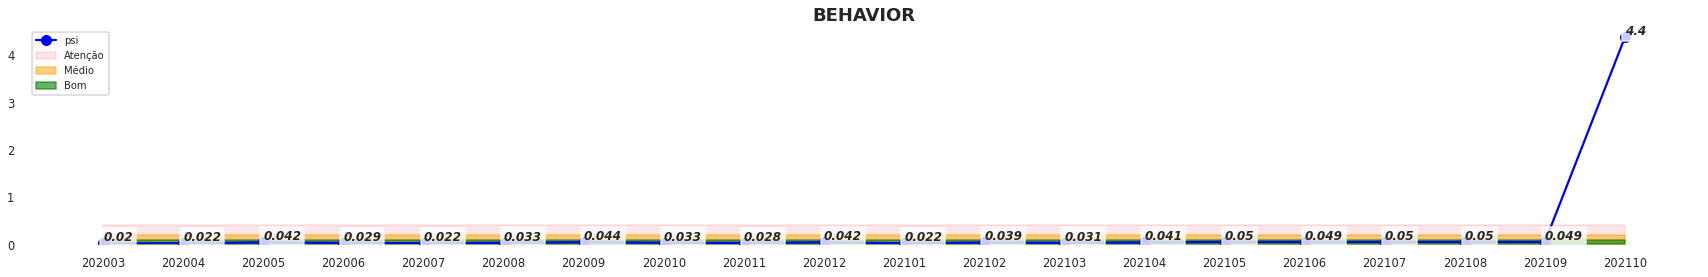

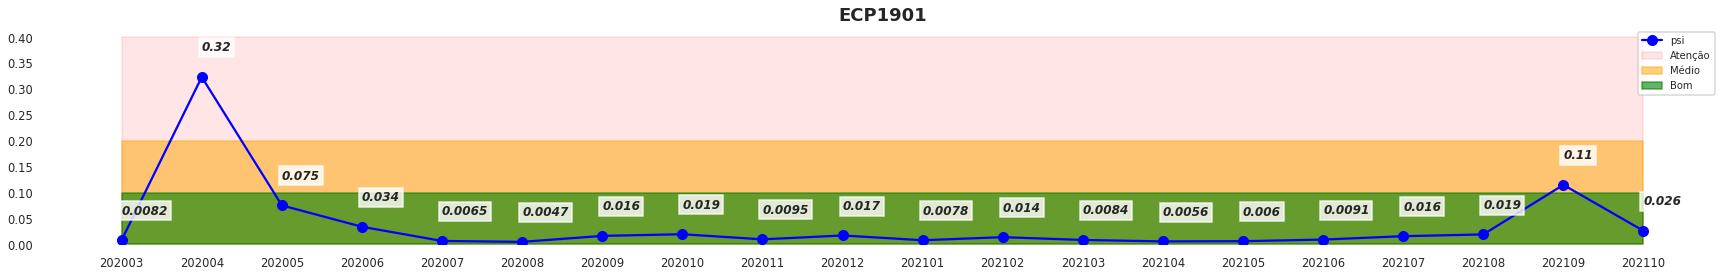

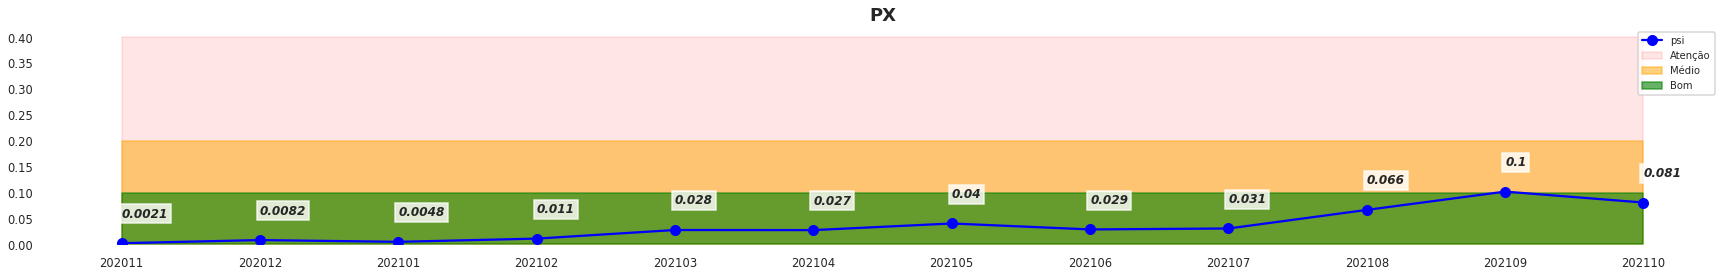

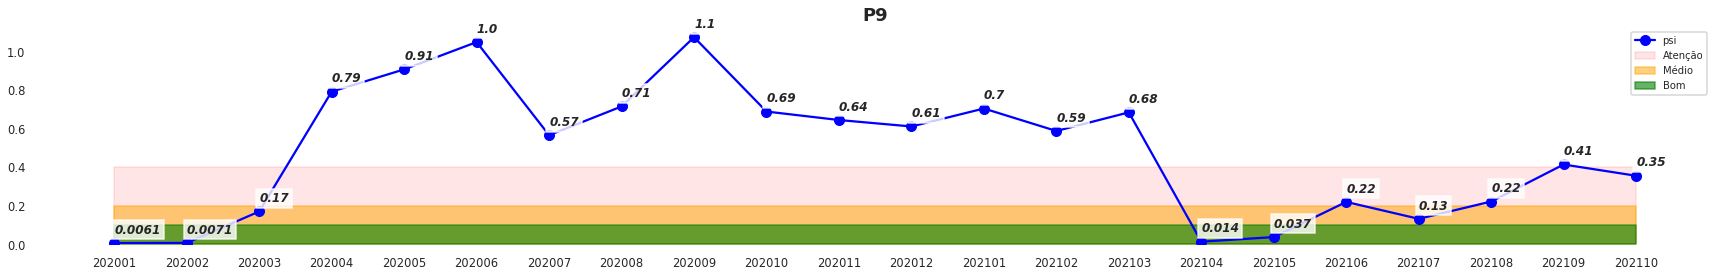

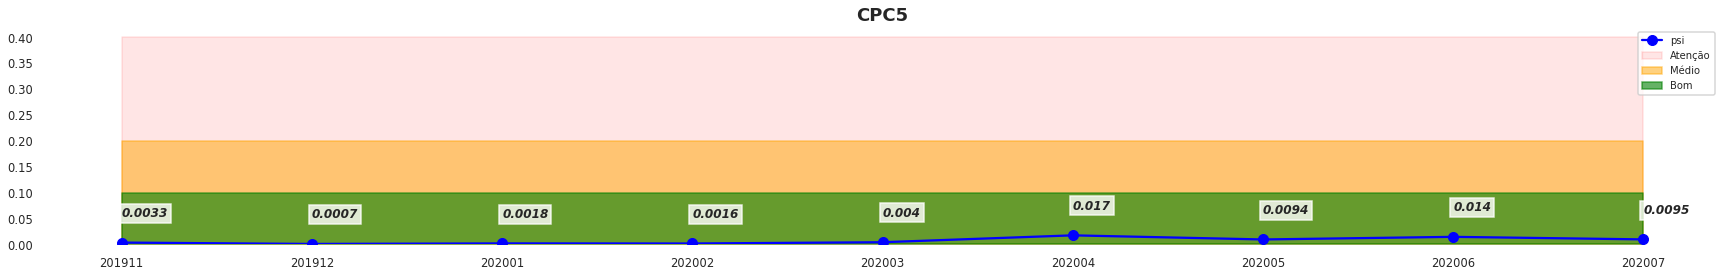

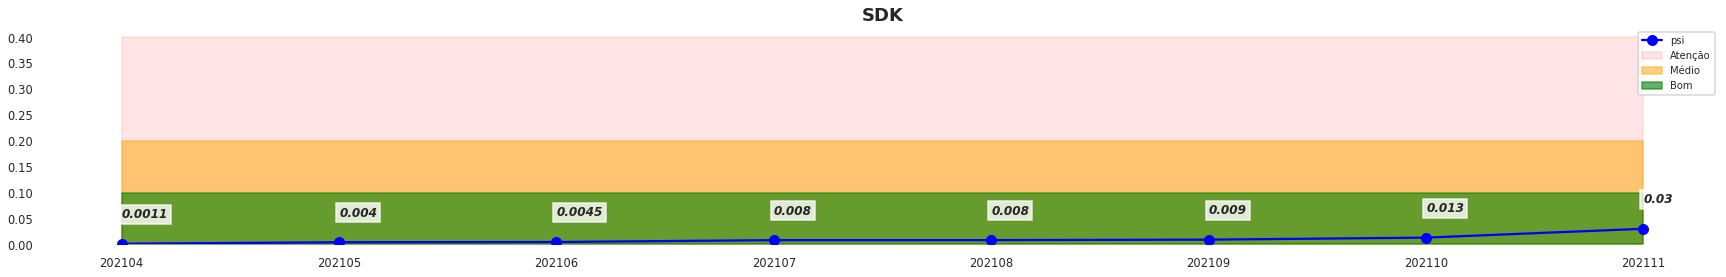

In [0]:
sns.set_style("white")
sns.set_context("talk", font_scale=0.7)

#plot = psi_total.groupby('Safra').agg(psi_tot=('PSI','sum')).reset_index().copy()
#plot = plot[plot['Safra']!='Consolidado'].copy()
#plot = plot[plot['Safra'].astype(int) >= 201912].reset_index()

for modelo in modelos:
  
  plot = psi_total[psi_total['Modelo']==modelo].groupby('Safra').agg(psi_tot=('PSI','sum')).reset_index().copy()
  
  if modelo == 'CPC5':
    plot = plot[plot['Safra'].astype(int) < 202008]

  plot['limit_bom'] = 0.1
  plot['limit_med'] = 0.2
  plot['limit_mau'] = 0.4
  f, ax = plt.subplots(1,figsize=(30,4))

  plt.fill_between(plot['Safra'], plot['limit_mau'], label='Atenção', color='red', alpha=0.1)
  plt.fill_between(plot['Safra'], plot['limit_med'], label='Médio', color='orange', alpha=0.5)
  plt.fill_between(plot['Safra'], plot['limit_bom'], label='Bom', color='green', alpha=0.6)

  plt.plot(plot['Safra'], plot['psi_tot'], marker='o',label='psi', color='blue', markersize=10)

  x = plot['Safra']
  y = plot['psi_tot']
  n = plot['psi_tot']

  for i, v in enumerate(n):
    plt.text(x[i], y[i]+0.05, "{:.02}".format(v), fontsize=12, weight='bold', style='italic', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 3})

  ax.set_ylim(bottom=0)
  #ax.set_ylim(top=0.5)
  plt.legend(loc='best', fontsize=10)
  plt.title(modelo, fontsize=18, weight='bold')
  sns.despine(bottom = True, left = True)
  plt.show()

In [0]:
#aqui precisamos recalculas os decis para calculo do KS

modelos = ['BEHAVIOR', 'ECP1901', 'PX', 'P9', 'CPC5', 'SDK']

decil_modelos_efet = None

for modelo in modelos:
  
  #data de desenvolvimento ''
  if modelo == 'BEHAVIOR':
    dt_desenv = 202002
  elif modelo == 'ECP1901':
    dt_desenv = 202002
  elif modelo == 'PX':
    dt_desenv = 202010
  elif modelo == 'P9':
    dt_desenv = 201912
  elif modelo == 'CPC5':
    dt_desenv = 201910
  elif modelo == 'SDK':
    dt_desenv = 202103
    
  #---------------------------Período Desenv-------------------------------
  
  #Consulta periodo desenvolvimento para geração dos decis
  query = ("select * from tmp_mm_px where ds_modelo = '" + modelo + "' and ds_safra <= " + str(dt_desenv) + " and flag_efetivadas = 1")

  #consulta
  decil_desenv = spark.sql(query).select("*").toPandas()

  #retorna os bins para os decis de desenvolvimento -> Todos, para calculo do PSI
  res, fx_desenv = pd.qcut(decil_desenv['nr_score'], 10, retbins=True)
  
  #caso o modelo retorne algum valor que não existe, estou mudando manualmente os bins
  fx_desenv[0] = -10

  #Volumetria por Decil, podemos verificar que existe uma certa concentração na faixa 4
  decil_desenv = decil_desenv.groupby(pd.qcut(decil_desenv.nr_score, 10))['nr_proposta'].count()

  #DataFrame com os decis do desenvolvimento 
  decil_desenv = pd.DataFrame(decil_desenv).reset_index().reset_index().rename(columns={'index':'gp', 'nr_score':'fx_desenv'})
  decil_desenv['pct_desenv'] = decil_desenv['nr_proposta']/sum(decil_desenv['nr_proposta'])

  
  #------------------------------Produção-------------------------------
  
  #Consulta periodo desenvolvimento para geração dos decis
  query = ("select * from tmp_mm_px where ds_modelo = '" + modelo + "' and flag_efetivadas = 1")

  #Consulta
  decil_prod_efet = spark.sql(query).select("*").toPandas()

  #Realiza as quebras no dataframe de produção
  decil_prod_efet = decil_prod_efet.merge(pd.DataFrame(pd.cut(decil_prod_efet['nr_score'],fx_desenv)).rename(columns={'nr_score':'fx_desenv'}),how='left', right_index=True, left_index=True)

  #Cria os grupos -> o Fillna 0 funciona pois para a primeira faixa a função cut realiza uma quebra menor no primeiro numero
  decil_prod_efet = decil_prod_efet.merge(decil_desenv[['fx_desenv','gp']],how='left',on='fx_desenv').fillna({"gp": 0})

  #Transformo a variavel fx_desenv em string para realizar a conversa em spark dataframe, posteriormente em uma view para criar os graficos stacked 100%
  decil_prod_efet['fx_desenv'] = decil_prod_efet['fx_desenv'].astype(str)
  
  #Appenda o resultado do processamento para uma tabela agrupada
  if decil_modelos_efet is None:
    decil_modelos_efet = decil_prod_efet
  else:
    decil_modelos_efet = decil_modelos_efet.append(decil_prod_efet)
    
#Criando uma view para consulta
spark.createDataFrame(decil_modelos_efet).createOrReplaceTempView('decil_modelos_efet')

In [0]:
%sql
create or replace temp view tmp_mm_px_agg as
select 
    a.ds_modelo,
    a.ds_safra,
    a.fl_sin4,
    a.gp as GH,
    a.fx_desenv,
    --a.nr_score as nr_score,
    count(a.nr_proposta) as QT
from 
    decil_modelos_efet    as a
where fl_sin4 is not null and fx_desenv != 'nan' 
group by 1,2,3,4,5
order by ds_safra, GH

In [0]:
%sql
select * from tmp_mm_px_agg

ds_modelo,ds_safra,fl_sin4,GH,fx_desenv,QT
P9,201808,1.0,0.0,"(-10.0, 507.0]",6
BEHAVIOR,201808,1.0,0.0,"(-10.0, 747.0]",3
BEHAVIOR,201808,0.0,0.0,"(-10.0, 747.0]",26
P9,201808,0.0,0.0,"(-10.0, 507.0]",30
P9,201808,1.0,1.0,"(507.0, 555.0]",12
P9,201808,0.0,1.0,"(507.0, 555.0]",31
BEHAVIOR,201808,0.0,1.0,"(747.0, 770.0]",1
P9,201808,1.0,2.0,"(555.0, 590.0]",15
P9,201808,0.0,2.0,"(555.0, 590.0]",59
P9,201808,0.0,3.0,"(590.0, 626.0]",32


In [0]:
#contador de loops
cont = 0

for modelo in modelos:
  #processamento em looping

  #selecao das safras
  safras = spark.sql("select distinct ds_safra from tmp_mm_px_agg where ds_modelo = '" + modelo + "' order by ds_safra").select("*").toPandas()
  
  #Retira safras sem um numero minimo de registros
  if modelo == 'BEHAVIOR':
    safras = safras[safras['ds_safra'].astype(int) >= 201906]
  
  #Adiciona o consolidado para processamento do KS historico
  safras.loc[len(safras)+1] = 'Consolidado'
  
  for safra in np.array(safras):

    if safra[0] == 'Consolidado':
      df_bh = spark.sql("select * from tmp_mm_px_agg where ds_modelo = '" + modelo + "'").select("*").toPandas()
    else:
      df_bh = spark.sql("select * from tmp_mm_px_agg where ds_safra = '" + safra[0] + "' and ds_modelo = '" + modelo + "'").select("*").toPandas()

    df_bh.fillna(0,inplace=True)    

    #BOMS
    gains_table = df_bh.query('fl_sin4 == 0').groupby(['GH','fx_desenv']).agg({'QT': 'sum'}).reset_index().rename(columns={"QT": "qtd_bom"})

    #MAUS
    gains_table = gains_table.merge(df_bh.query('fl_sin4 == 1').groupby('GH').agg({'QT': 'sum'}).reset_index().rename(columns={"QT": "qtd_mau"}) , how='left', on='GH')

    #ALGUNS NÃO POSSUEM CONTRATOS NOS DECIS, PREENCHENDO COM ZEROS
    gains_table.fillna(0, inplace=True)

    #ACUM BONS E MAUS
    gains_table = gains_table.join(gains_table.cumsum().rename(columns={'qtd_bom': 'acum_bom', 'qtd_mau': 'acum_mau'}).drop(['GH','fx_desenv'],axis = 1))

    #TOTAL DE PROPOSTAS
    gains_table['total'] = gains_table['qtd_bom'] + gains_table['qtd_mau']

    #PERCENTUAL DO GRUPO EM RELACAO AO TOTAL
    #gains_table['pct_total'] = (gains_table['qtd_bom'] + gains_table['qtd_mau'])/sum((gains_table['qtd_bom'] + gains_table['qtd_mau']))

    gains_table = gains_table.merge(gp_desenv, how='left', on='GH')

    #BAD INTERVALAR
    gains_table['bad_interval'] = gains_table['qtd_mau'] / gains_table['total']

    #MAU INTERVALAR
    gains_table['mau_intervalar'] = gains_table['qtd_mau'] / sum(gains_table['qtd_mau'])

    #BOM INTERVALAR
    gains_table['bom_intervalar'] = gains_table['qtd_bom'] / sum(gains_table['qtd_bom'])

    #PCT ACUM MAUS
    gains_table['pct_acum_mau'] = gains_table['acum_mau'] / sum(gains_table['qtd_mau'])

    #PCT ACUM BONS
    gains_table['pct_acum_bons'] = gains_table['acum_bom'] / sum(gains_table['qtd_bom'])

    #LAG BONS CALCULO GINI
    calc_gini = gains_table[['GH','pct_acum_bons']].copy()
    calc_gini['GH'] = calc_gini['GH'] + 1
    calc_gini.rename(columns={'pct_acum_bons': 'lag_bons'}, inplace=True)

    gains_table = gains_table.merge(calc_gini, how='left',on='GH')

    #ALGUNS NÃO POSSUEM CONTRATOS NOS DECIS, PREENCHENDO COM ZEROS
    gains_table.fillna(0, inplace=True)

    #PSI
    #gains_table['PSI'] = (gains_table['pct_total'] - gains_table['pct_desenv']) * np.log(gains_table['pct_total'] / gains_table['pct_desenv'])

    #KS2
    gains_table['ks2'] = abs(gains_table['pct_acum_mau'] - gains_table['pct_acum_bons'])

    #gini
    gains_table['Gini'] = gains_table['mau_intervalar'] * (gains_table['pct_acum_bons']+gains_table['lag_bons']) * 0.5

    #safra
    gains_table['Safra'] = safra[0]
    
    #Modelo
    gains_table['Modelo'] = modelo

    if cont == 0:
      gains_total = gains_table
    else:
      gains_total = gains_total.append(gains_table)

    cont += 1

In [0]:
gains_total[(gains_total['Modelo'] == "SDK") & (gains_total['Safra'] == "202106")]

Out[13]:

,GH,fx_desenv,qtd_bom,qtd_mau,acum_bom,acum_mau,total,pct_desenv,bad_interval,mau_intervalar,bom_intervalar,pct_acum_mau,pct_acum_bons,lag_bons,ks2,Gini,Safra,Modelo
0,0.0,"(-10.0, 400.2]",24,0.0,24,0.0,24.0,0.100780,0.000000,0.00,0.133333,0.00,0.133333,0.000000,0.133333,0.000000,202104,SDK
1,1.0,"(400.2, 495.0]",44,0.0,68,0.0,44.0,0.100145,0.000000,0.00,0.244444,0.00,0.377778,0.133333,0.377778,0.000000,202104,SDK
2,2.0,"(495.0, 547.0]",20,0.0,88,0.0,20.0,0.100451,0.000000,0.00,0.111111,0.00,0.488889,0.377778,0.488889,0.000000,202104,SDK
3,3.0,"(547.0, 602.0]",6,0.0,94,0.0,6.0,0.098661,0.000000,0.00,0.033333,0.00,0.522222,0.488889,0.522222,0.000000,202104,SDK
4,4.0,"(602.0, 674.0]",20,0.0,114,0.0,20.0,0.101377,0.000000,0.00,0.111111,0.00,0.633333,0.522222,0.633333,0.000000,202104,SDK
5,5.0,"(674.0, 704.0]",7,0.0,121,0.0,7.0,0.100059,0.000000,0.00,0.038889,0.00,0.672222,0.633333,0.672222,0.000000,202104,SDK
6,6.0,"(704.0, 734.6]",4,3.0,125,3.0,7.0,0.099434,0.428571,0.75,0.022222,0.75,0.694444,0.672222,0.055556,0.512500,202104,SDK
7,7.0,"(734.6, 799.0]",28,1.0,153,4.0,29.0,0.100484,0.034483,0.25,0.155556,1.00,0.850000,0.694444,0.150000,0.193056,202104,SDK
8,8.0,"(799.0, 816.0]",14,0.0,167,4.0,14.0,0.100293,0.000000,0.00,0.077778,1.00,0.927778,0.850000,0.072222,0.000000,202104,SDK
9,9.0,"(816.0, 921.0]",13,0.0,180,4.0,13.0,0.098317,0.000000,0.00,0.072222,1.00,1.000000,0.927778,0.000000,0.000000,202104,SDK


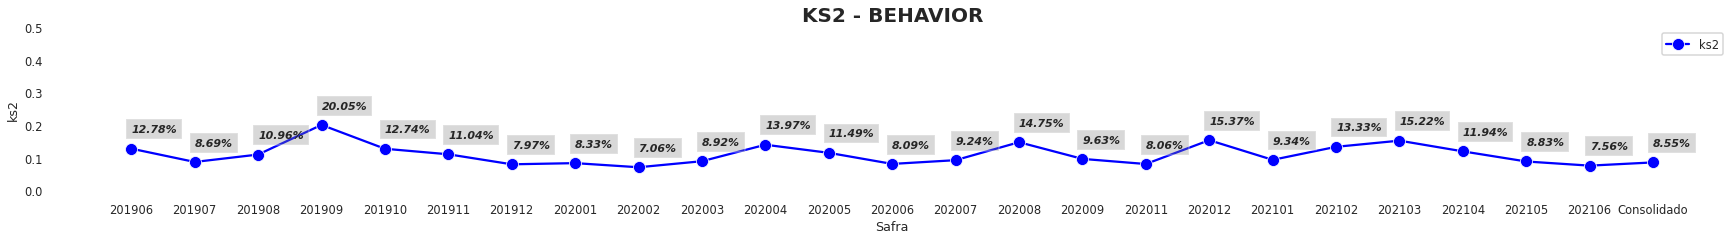

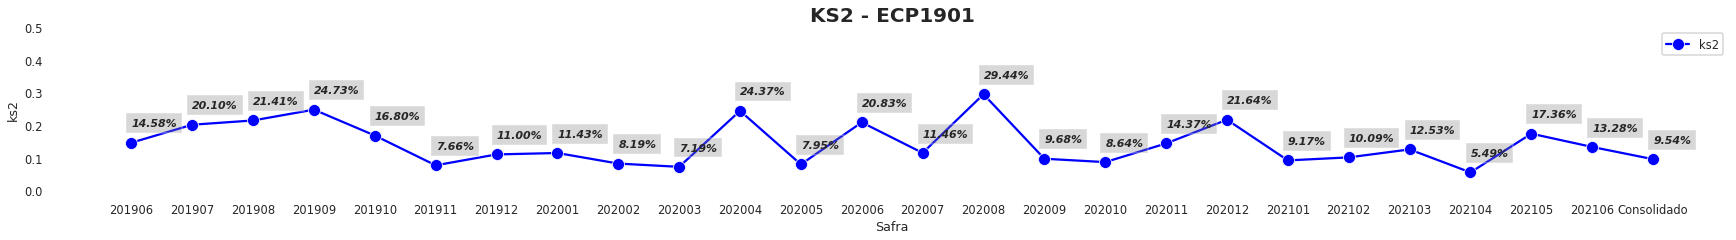

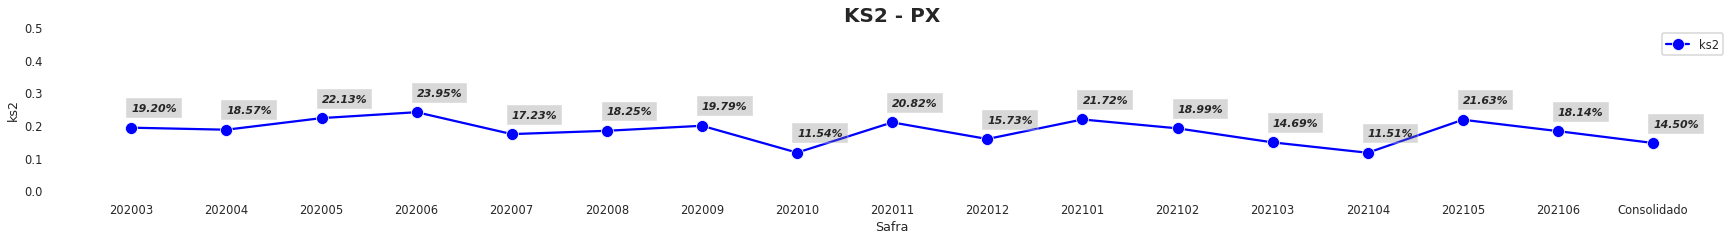

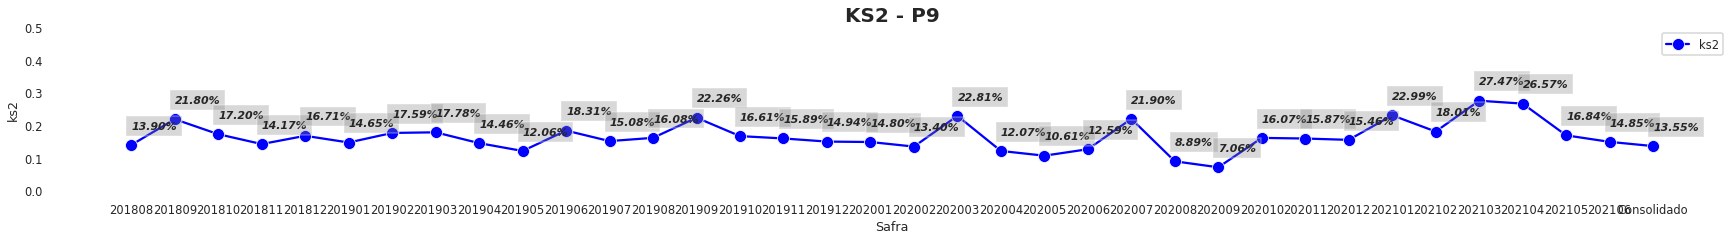

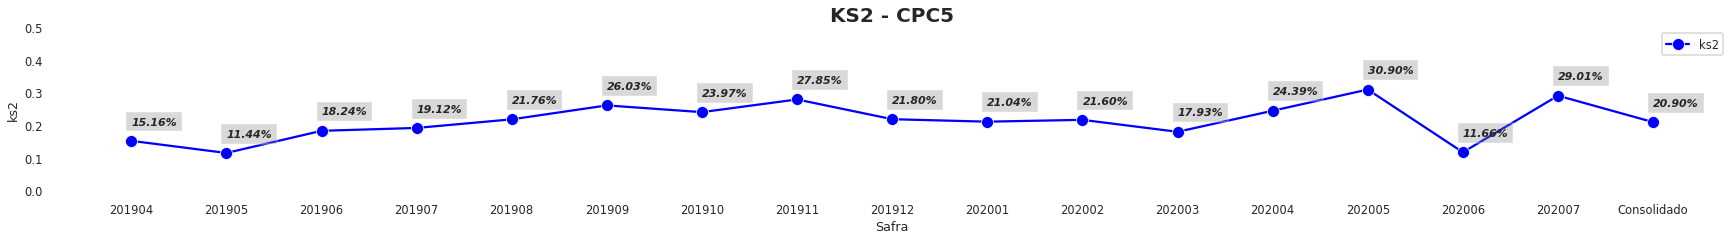

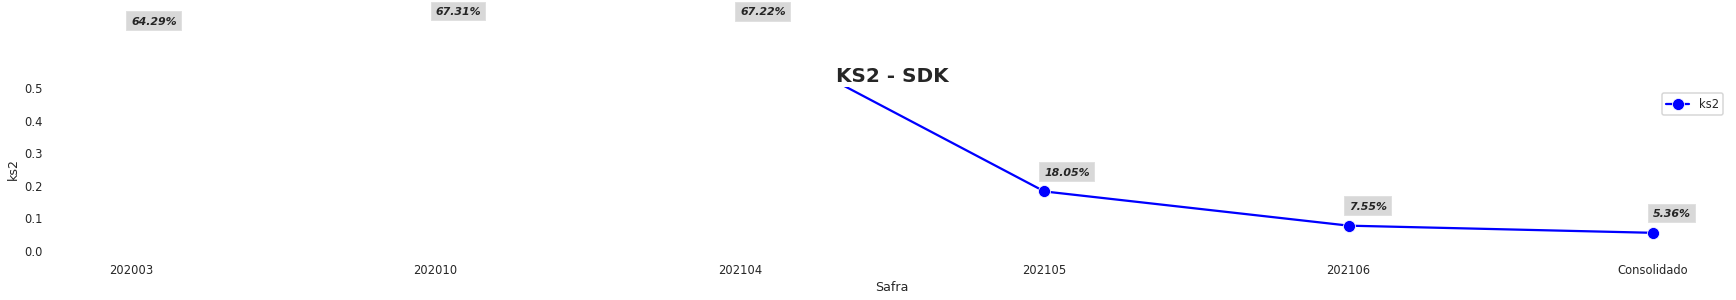

In [0]:
for modelo in modelos:
  
  plot_ks = gains_total[(gains_total['Modelo'] == modelo)].groupby(['Safra']).agg(ks2=('ks2','max')).reset_index().copy()
  plot_ks = plot_ks[plot_ks['ks2'] < 1].reset_index()
  
  f, ax = plt.subplots(1,figsize=(30,3))
  sns.lineplot(data=plot_ks, x='Safra', y='ks2', markers=True, marker='o',label='ks2', color='blue', markersize=12)
  ax.set_ylim(bottom=0)
  ax.set_ylim(top=0.5)
  plt.title('KS2 - '+modelo, fontsize=20, weight='bold')

  x = plot_ks['Safra']
  y = plot_ks['ks2']
  n = plot_ks['ks2']

  for i, v in enumerate(n):
    plt.text(x[i], y[i]+0.05, "{:.2%}".format(v), fontsize=11, weight='bold', style='italic', bbox={'facecolor': 'gray', 'alpha': 0.3, 'pad': 5})

  sns.despine(bottom = True, left = True)
  plt.show()

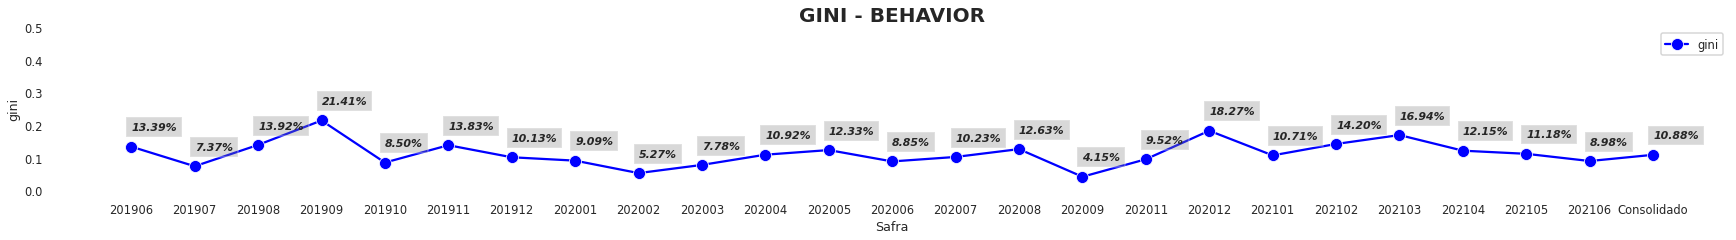

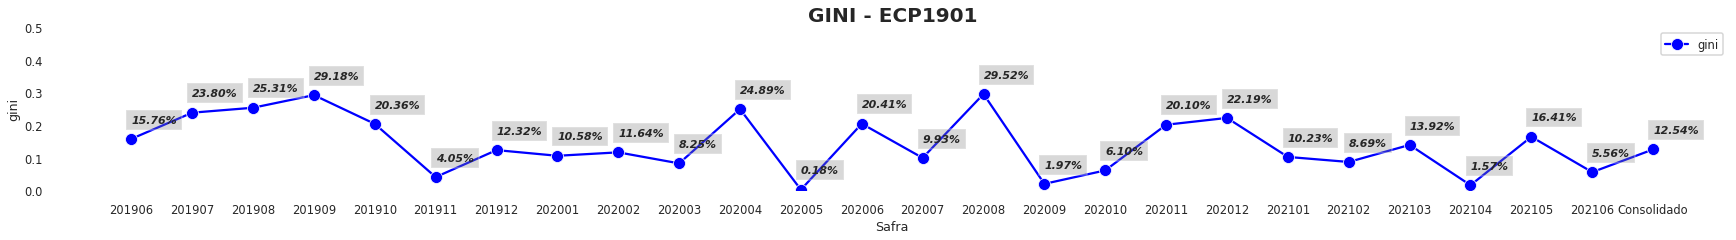

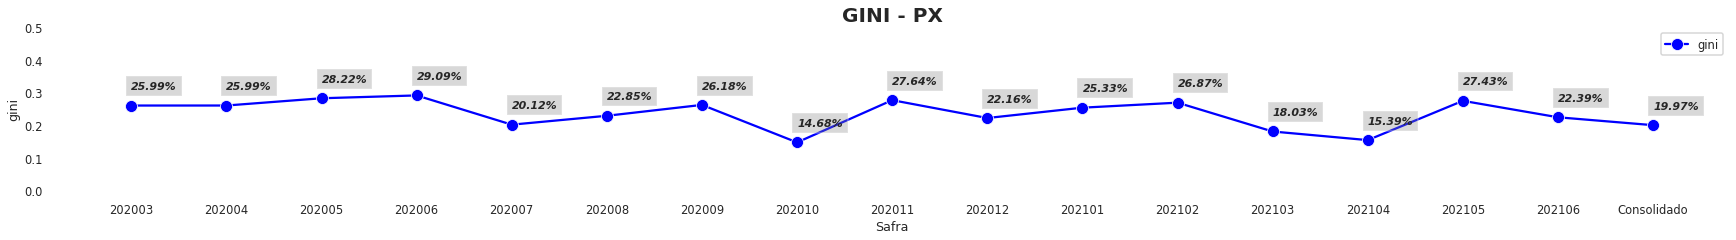

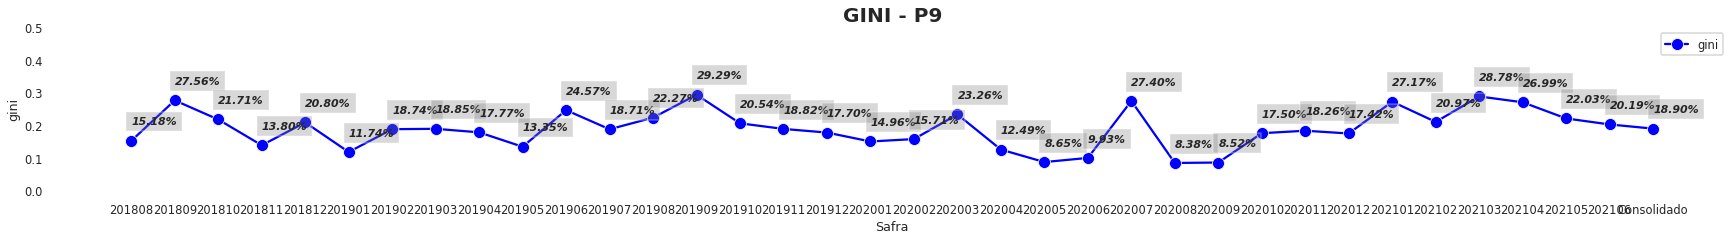

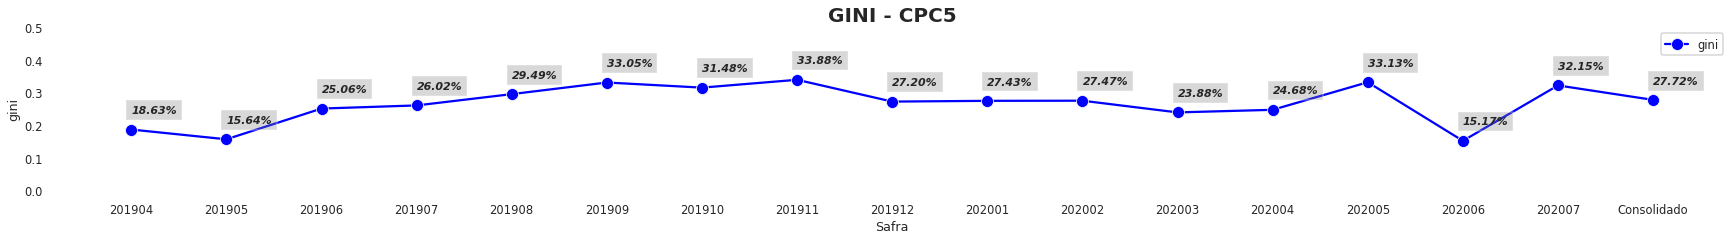

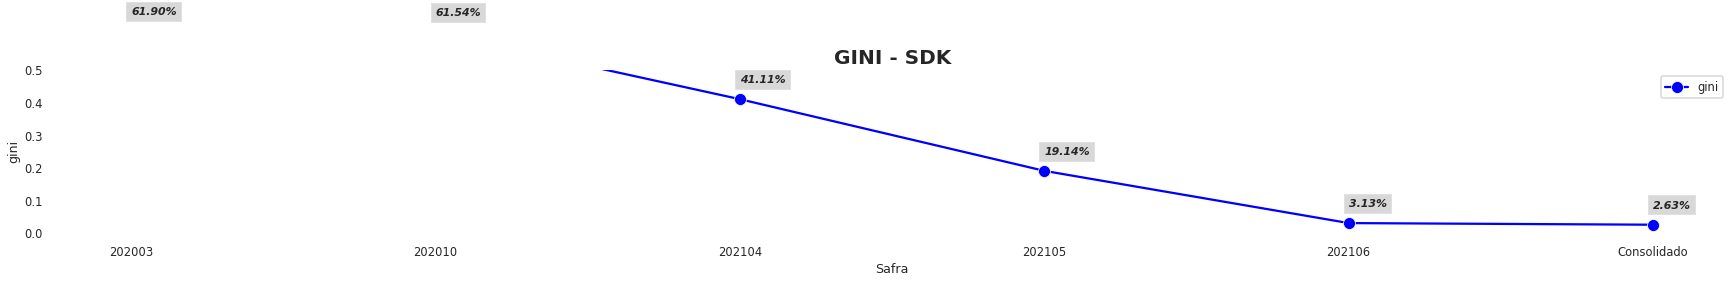

In [0]:
for modelo in modelos:

  plot_gini = gains_total[(gains_total['Modelo'] == modelo)].groupby(['Safra']).agg(auc=('Gini','sum')).reset_index().copy()
  #plot_gini = plot_ks[plot_ks['ks2'] < 1].reset_index()
  plot_gini['gini'] = abs(2*(0.5-plot_gini['auc']))

  plot_gini = plot_gini[plot_gini['gini'] < 1].reset_index()

  f, ax = plt.subplots(1,figsize=(30,3))
  sns.lineplot(data=plot_gini, x='Safra', y='gini', markers=True, marker='o',label='gini', color='blue', markersize=12)
  ax.set_ylim(bottom=0)
  ax.set_ylim(top=0.5)
  plt.title('GINI - ' + modelo, fontsize=20, weight='bold')

  x = plot_gini['Safra']
  y = plot_gini['gini']
  n = plot_gini['gini']

  for i, v in enumerate(n):
    plt.text(x[i], y[i]+0.05, "{:.2%}".format(v), fontsize=11, weight='bold', style='italic', bbox={'facecolor': 'gray', 'alpha': 0.3, 'pad': 5})

  sns.despine(bottom = True, left = True)
  plt.show()


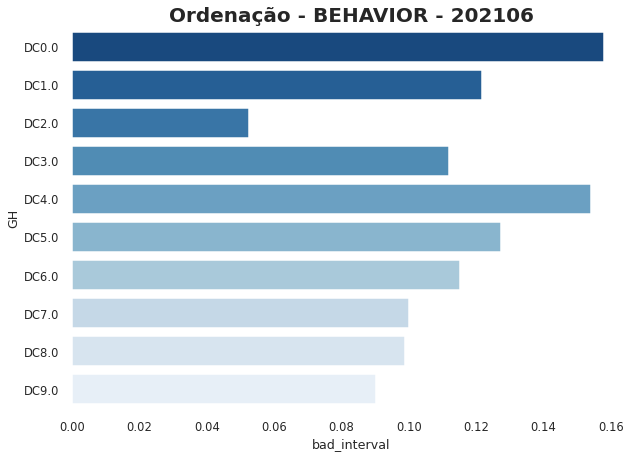

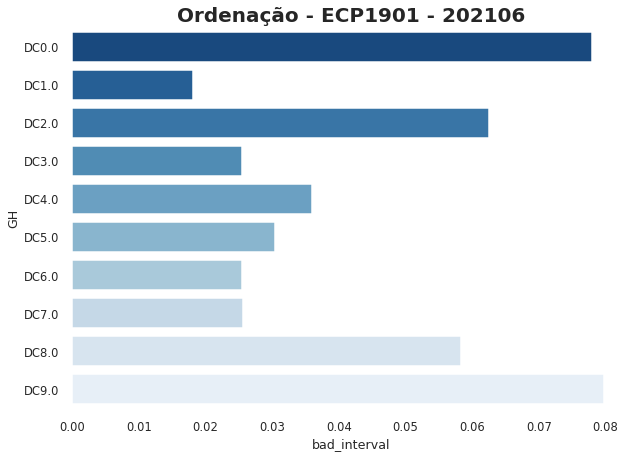

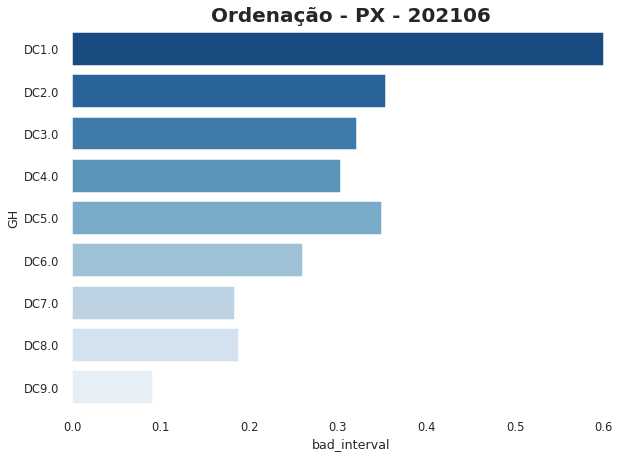

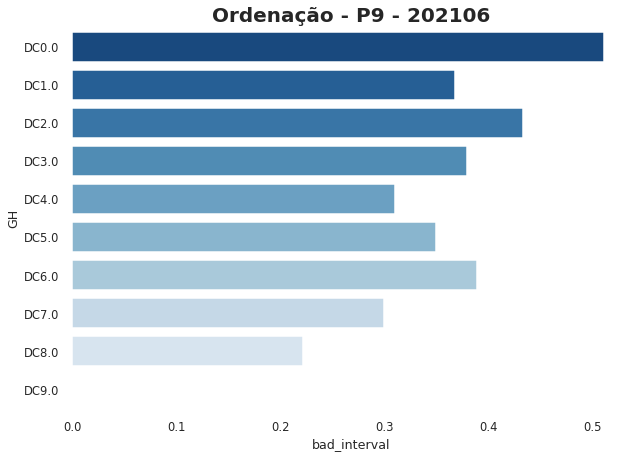

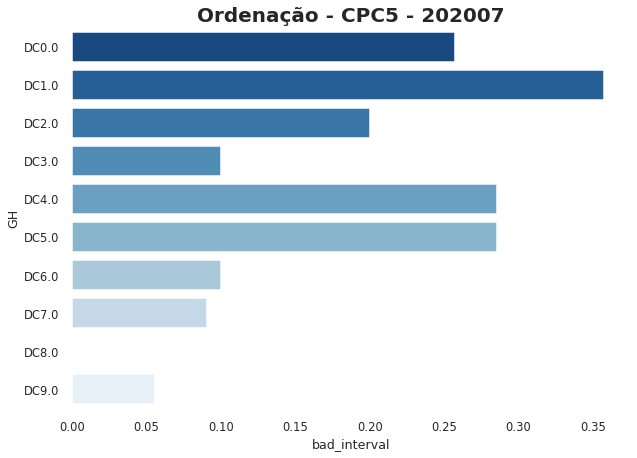

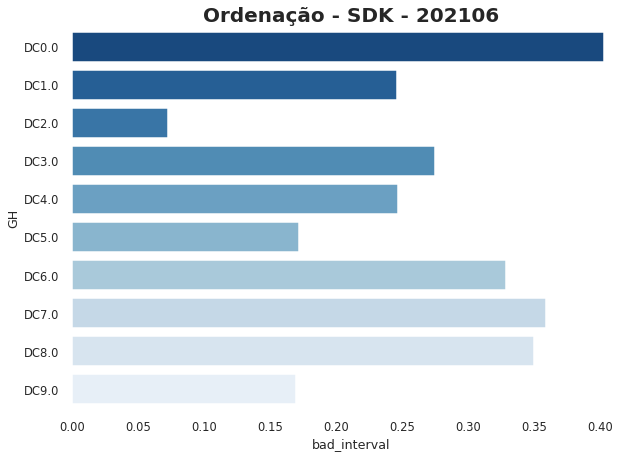

In [0]:
for modelo in modelos:
  
  plot_gh = gains_total[(gains_total['Modelo'] == modelo)].groupby(['Safra']).agg(qtd_mau=('qtd_mau','sum')).reset_index().copy()
  plot_gh = plot_gh[plot_gh['Safra']!='Consolidado'].copy()
  plot_gh = plot_gh[plot_gh['qtd_mau'] > 0].reset_index().drop(['index','qtd_mau'], axis=1)

  #buscando dados da ultima diaria com performance
  plot_gh = gains_total[(gains_total['Safra']==plot_gh['Safra'].tail(1).values[0]) & (gains_total['Modelo'] == modelo)].copy()

  plot_gh['GH'] = "DC" + plot_gh['GH'].astype(str)

  plt.figure(figsize=(10,7))
  g = sns.barplot(x='bad_interval', y='GH', data=plot_gh, palette = 'Blues_r',  color = 'b', ci = None)
  sns.despine(bottom = True, left = True)
  plt.title('Ordenação - '+ modelo +' - ' + plot_gh['Safra'].tail(1).values[0], fontsize=20, weight='bold')
  plt.show()